<a href="https://colab.research.google.com/github/Arpingh01/ds_arpita_singh/blob/main/notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv("cleaned_trader_sentiment.csv")


In [11]:
daily_pnl = df.groupby('date')['closed_pnl'].sum().reset_index()
daily_pnl.rename(columns={'closed_pnl': 'daily_pnl'}, inplace=True)

df = df.merge(daily_pnl, on='date', how='left')

In [12]:
volume_usd = df.groupby('date')['size_usd'].sum().reset_index(name='trade_volume_usd')
df = df.merge(volume_usd, on='date', how='left')


In [13]:
df['leverage'] = pd.to_numeric(df['leverage'], errors='coerce')

avg_leverage = df.groupby('date')['leverage'].mean().reset_index(name='avg_leverage')
df = df.merge(avg_leverage, on='date', how='left')




In [14]:
df['sentiment_label'] = df['classification'].map({
    'Extreme Fear': -2,
    'Fear': -1,
    'Neutral': 0,
    'Greed': 1,
    'Extreme Greed': 2
})



In [17]:
df.info()
df[['date', 'daily_pnl_y', 'trade_volume_usd_y', 'avg_leverage_y', 'sentiment_label']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account             4149 non-null   object 
 1   coin                4148 non-null   object 
 2   execution_price     4148 non-null   float64
 3   size_tokens         4148 non-null   float64
 4   size_usd            4148 non-null   float64
 5   side                4148 non-null   object 
 6   timestamp_ist       4148 non-null   object 
 7   start_position      4148 non-null   float64
 8   direction           4148 non-null   object 
 9   closed_pnl          4148 non-null   float64
 10  transaction_hash    4148 non-null   object 
 11  order_id            4148 non-null   float64
 12  crossed             4148 non-null   object 
 13  fee                 4148 non-null   float64
 14  trade_id            4148 non-null   float64
 15  date                4148 non-null   object 
 16  value 

,date,daily_pnl_y,trade_volume_usd_y,avg_leverage_y,sentiment_label
0,2024-12-02,0.0,80321.22,210.014045,1.0
1,2024-12-02,0.0,80321.22,210.014045,1.0
2,2024-12-02,0.0,80321.22,210.014045,1.0
3,2024-12-02,0.0,80321.22,210.014045,1.0
4,2024-12-02,0.0,80321.22,210.014045,1.0


In [23]:
df.to_csv("feature_engineered_trader_sentiment.csv", index=False)
df.to_csv("feature_engineered_trader_sentiment.xlsx", index=False)



In [24]:
pnl_vs_sentiment = (
    df.groupby('classification')['closed_pnl']
    .mean()
    .reset_index(name='avg_closed_pnl')
)

pnl_vs_sentiment


,classification,avg_closed_pnl
0,Extreme Fear,0.000000
1,Extreme Greed,69.188131
2,Fear,647.121964
3,Greed,75.429280
4,Neutral,66.020260


In [27]:
leverage_vs_sentiment = (
    df.groupby('classification')['avg_leverage_y']
    .mean()
    .reset_index(name='avg_leverage')
)

leverage_vs_sentiment

,classification,avg_leverage
0,Extreme Fear,192.658017
1,Extreme Greed,126205.033512
2,Fear,23476.157349
3,Greed,53287.190635
4,Neutral,137591.251396


In [29]:
volume_vs_sentiment = (
    df.groupby('classification')['trade_volume_usd_y']
    .mean()
    .reset_index(name='avg_trade_volume_usd')
)

volume_vs_sentiment

,classification,avg_trade_volume_usd
0,Extreme Fear,1.026715e+05
1,Extreme Greed,4.191089e+05
2,Fear,1.507949e+06
3,Greed,1.987858e+06
4,Neutral,5.179652e+05


In [31]:
df[['sentiment_label', 'daily_pnl_y', 'trade_volume_usd_y', 'avg_leverage_y']].corr()

,sentiment_label,daily_pnl_y,trade_volume_usd_y,avg_leverage_y
sentiment_label,1.000000,-0.583880,-0.013804,0.246179
daily_pnl_y,-0.583880,1.000000,0.334305,-0.262038
trade_volume_usd_y,-0.013804,0.334305,1.000000,-0.206470
avg_leverage_y,0.246179,-0.262038,-0.206470,1.000000


In [32]:
import os
os.makedirs("outputs", exist_ok=True)


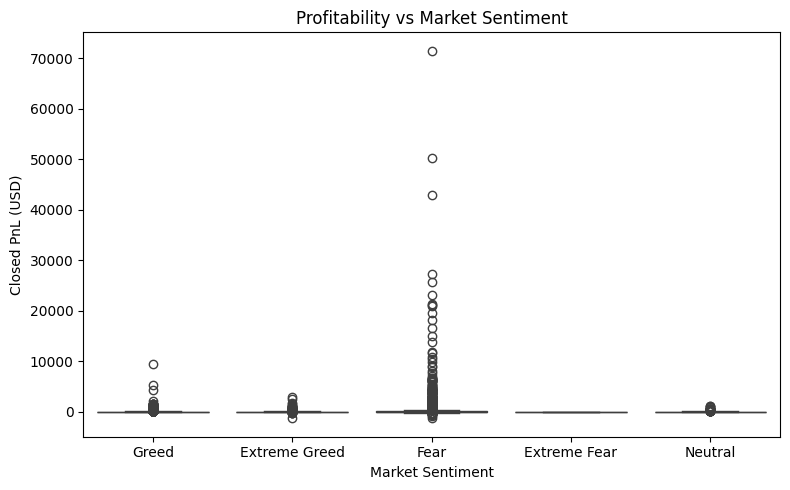

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='closed_pnl', data=df)
plt.title("Profitability vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL (USD)")
plt.tight_layout()
plt.savefig("outputs/pnl_vs_sentiment.png")
plt.show()


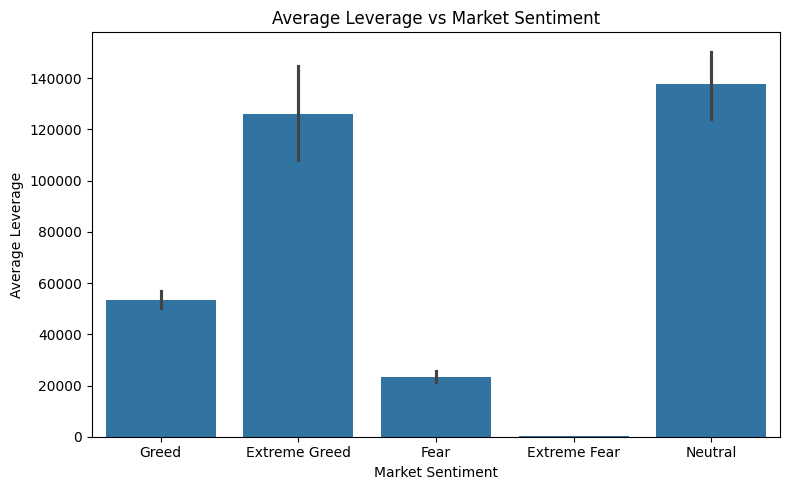

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='avg_leverage_y', data=df, estimator='mean')
plt.title("Average Leverage vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Leverage")
plt.tight_layout()
plt.savefig("outputs/leverage_vs_sentiment.png")
plt.show()

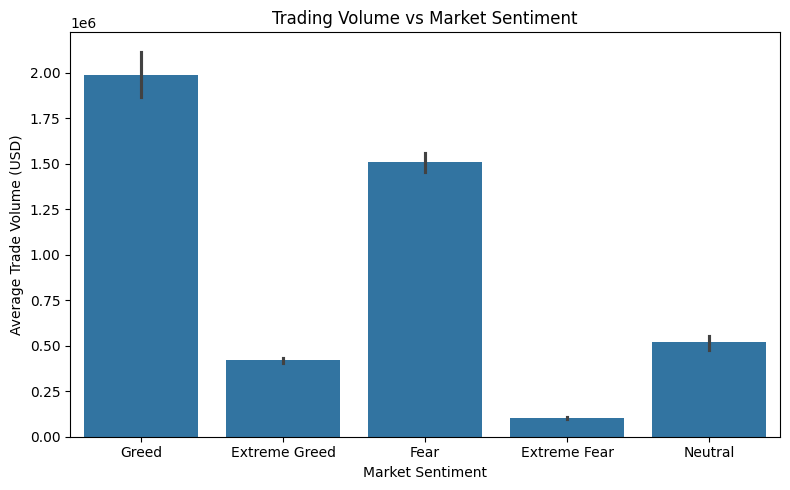

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='trade_volume_usd_y', data=df, estimator='mean')
plt.title("Trading Volume vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Volume (USD)")
plt.tight_layout()
plt.savefig("outputs/volume_vs_sentiment.png")
plt.show()

In [40]:
!ls -l outputs/

total 88
-rw-r--r-- 1 root root 28310 Dec 17 18:50 leverage_vs_sentiment.png
-rw-r--r-- 1 root root 31483 Dec 17 18:47 pnl_vs_sentiment.png
-rw-r--r-- 1 root root 27466 Dec 17 18:51 volume_vs_sentiment.png
